# Time series plot of COVID-19 cummulative confirmed cases by country

Hiroshi Maruyama (Twitter: @maruyama)

## Log plot of confirmes cases

Data source: Johns Hopkins University Center for Systems Science and Engineering ([GitHub](https://github.com/CSSEGISandData/COVID-19), [Dashboard](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6))


last_date = 3/27/20


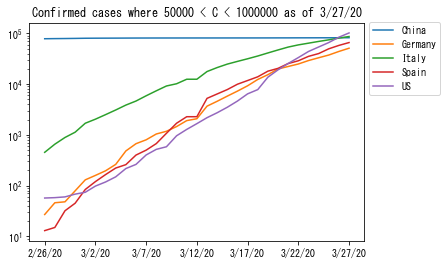

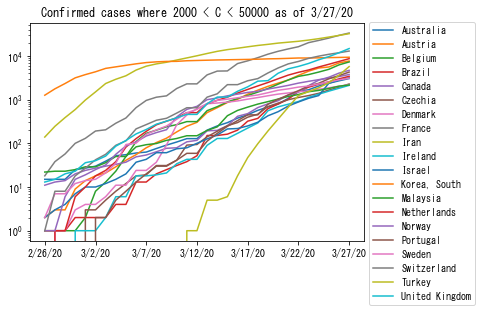

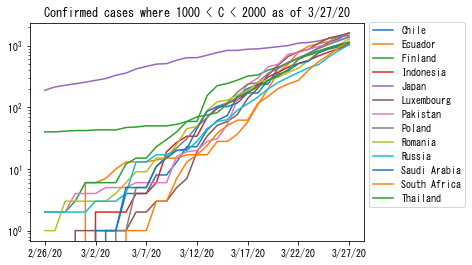

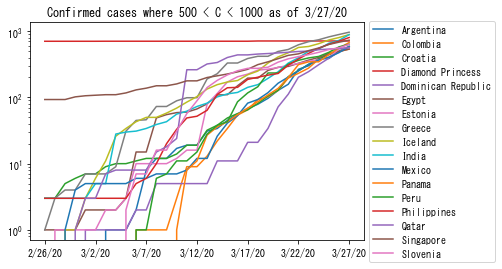

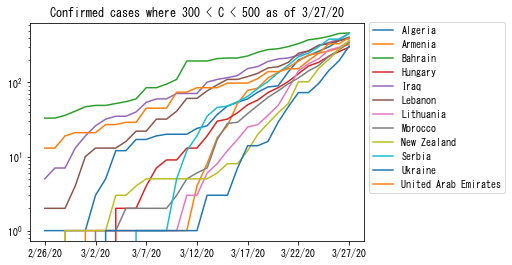

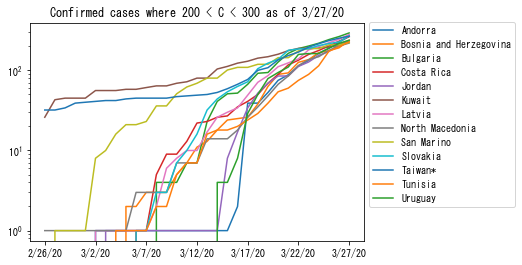

In [22]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df = df.drop(columns=["Lat", "Long"])

last_date = df.columns[-1]
print("last_date =", last_date)

country_df = df.groupby("Country/Region").sum()

def plot_log_confirmed(min, max):
    t = country_df[(min <= country_df[last_date]) & (country_df[last_date] < max)  ].T
    title = "Confirmed cases where {} < C < {} as of {}".format(min, max, last_date)
    t[35:].plot(logy=True, title=title).legend(bbox_to_anchor=(1, 1.03), loc='upper left')

plot_log_confirmed(50000, 1000000)
plot_log_confirmed(2000, 50000)
plot_log_confirmed(1000,  2000)
plot_log_confirmed(500,   1000)
plot_log_confirmed(300,    500)
plot_log_confirmed(200,    300)

## Daily increase rate of reported case by country

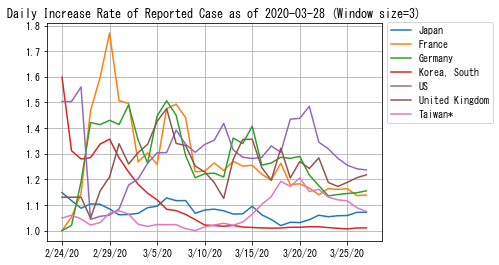

In [35]:
# 日次再生算数R（３日間の移動平均）をプロット
# Daily increase rate of reported case by country (moving average of windows size = 3)
countries = ("Japan", "France", "Germany", "Korea, South", "US", "United Kingdom", "Taiwan*")
# countries = ("Japan", "France", "Germany", "US", "Singapore", "United Kingdom", "Spain", "Switzerland")
window = 3
daily_r = country_df.T.pct_change() + 1.0
# daily_r.iloc[30:].loc[:, countries].rolling(window).mean().iloc[window:].plot(title="Daily Reproduction Rate by Country (Window size={})".format(window))

data_to_plot = np.exp(np.log(daily_r.iloc[30:].loc[:, countries]).rolling(window).mean().iloc[window:])
title = "Daily Increase Rate of Reported Case as of {} (Window size={})".format(last_date, window)
data_to_plot.plot(title=title, grid=True).legend(bbox_to_anchor=(1, 1.03), loc='upper left')
# data_to_plot

## (Deprecated) Japanese daily increase rate of reported case by prefecture

Data source: Toyo Keizai Online

Thanks to [Kazuki Ogiwara](https://toyokeizai.net/list/author/%E8%8D%BB%E5%8E%9F+%E5%92%8C%E6%A8%B9) of Toyo Keizai Online ([GitHub](https://github.com/kaz-ogiwara/covid19/), [Dashboard](https://toyokeizai.net/sp/visual/tko/covid19/))

len= 1036


<Figure size 432x288 with 0 Axes>

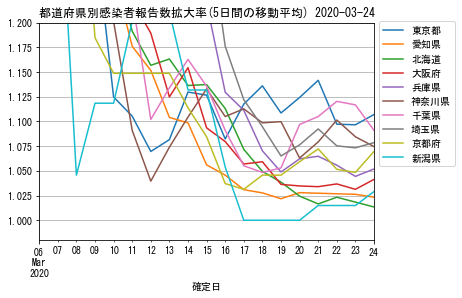

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
font = {'family' : 'MS Gothic'}
mpl.rc('font', **font)


df = pd.read_csv('https://raw.githubusercontent.com/kaz-ogiwara/covid19/master/data/individuals.csv', 
                 parse_dates=[["確定年", "確定月", "確定日"]])
print("len=", len(df))
# display(df)
# print(df.columns)
df = df.drop(['新No.', '旧No.', '年代', '性別', '居住地2', '備考'], axis=1)

# df.groupby("居住地").count()
#df.groupby(["確定年", "確定月", "確定日"]).count()
def get_data_by_pref(pref):  # 県ごとのデータを取得
    ts = df[df["居住地1"] == pref].groupby("確定年_確定月_確定日").count()
    ts.reset_index(inplace = True)
    # ts = ts.rename(columns={'確定年_確定月_確定日': '確定日',"居住地":"愛知県" })
    ts = ts.rename(columns={'確定年_確定月_確定日': '確定日',"居住地1" : pref})
    # ts = ts.set_index("確定日")
    return ts

fig = plt.figure()
window = 5
pref_data = get_data_by_pref("東京都")

for pref in ("愛知県", "北海道", "大阪府", "兵庫県", "神奈川県","千葉県","埼玉県","京都府","新潟県"):
    pref_data = pref_data.merge(get_data_by_pref(pref), how='outer', sort=True)
    # print(pref_data.describe())
# get_data_by_pref("東京都")
pref_data = pref_data.set_index("確定日")
last_date = pref_data.index[-1].date()

title = "都道府県別感染者報告数拡大率({}日間の移動平均) {}".format(window, last_date)

data_to_plot = np.exp(np.log(pref_data.loc["2020-03-1":,:].fillna(0).cumsum().pct_change() + 1.0).rolling(window).mean()).iloc[window:, :]
data_to_plot.plot(title=title, ylim=[0.98, 1.2], grid=True).legend(bbox_to_anchor=(1, 1.03), loc='upper left')
# data_to_plot


# Japanese daily increase rate by prefecture

Data source: [Jag Japan](https://gis.jag-japan.com/covid19jp/)

,東京都,愛知県,北海道,大阪府,兵庫県,神奈川県,千葉県,埼玉県,京都府,新潟県
確定日,,,,,,,,,,
2020-03-06,1.600434,1.615394,1.502870,NaN,1.515717,1.534206,1.475773,NaN,NaN,NaN
2020-03-07,1.682933,1.678757,1.328801,1.792398,1.584893,1.207911,1.515717,NaN,NaN,1.045640
2020-03-08,1.551846,1.335604,1.312094,1.663804,1.319508,1.176079,1.350960,NaN,1.430969,1.045640
2020-03-09,1.309945,1.233017,1.264332,1.314393,1.397654,1.176079,1.350960,NaN,1.272260,1.118427
2020-03-10,1.148698,1.201124,1.260927,1.375765,1.442700,1.107566,1.319508,1.406282,1.224240,1.148698
2020-03-11,1.113824,1.178445,1.211392,1.229957,1.365648,1.080185,1.148698,1.210583,1.210583,1.148698
2020-03-12,1.070740,1.154385,1.164123,1.180982,1.356912,1.076317,1.148698,1.306041,1.201124,1.210583
2020-03-13,1.081781,1.107566,1.155189,1.115276,1.360822,1.084472,1.161187,1.340801,1.201124,1.210583
2020-03-14,1.131153,1.100481,1.125934,1.139544,1.331653,1.092388,1.161187,1.360822,1.084472,1.164659


<Figure size 432x288 with 0 Axes>

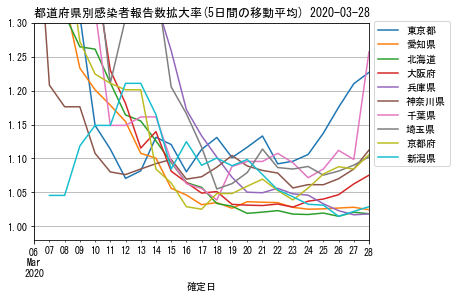

In [34]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
font = {'family' : 'MS Gothic'}
mpl.rc('font', **font)
fn = 'https://dl.dropboxusercontent.com/s/6mztoeb6xf78g5w/COVID-19.csv'
fn = 'data/JAG_Japan/COVID-19.csv'

def read_data():
    d = pd.read_csv(fn,usecols=["確定日", "受診都道府県"],parse_dates=["確定日"])
    d = d.drop(["不明", "中部国際空港", "成田空港", "羽田空港", "関西国際空港"], errors='ignore')
    return d

def get_data_by_pref(df, pref):  # 県ごとのデータを取得
    ts = df[df["受診都道府県"] == pref].groupby("確定日").count()
    ts.reset_index(inplace = True)
    # ts = ts.rename(columns={'確定年_確定月_確定日': '確定日',"居住地":"愛知県" })
    ts = ts.rename(columns={"受診都道府県" : pref})
    # ts = ts.set_index("確定日")
    return ts

df = read_data()
fig = plt.figure()
window = 5
pref_data = get_data_by_pref(df, "東京都")


for pref in ("愛知県", "北海道", "大阪府", "兵庫県", "神奈川県","千葉県","埼玉県","京都府","新潟県"):
    d = get_data_by_pref(df, pref)
    # display(d)
    pref_data = pref_data.merge(d, how='outer', sort=True)
    # print(pref_data.describe())  

pref_data = pref_data.set_index("確定日")
last_date = pref_data.index[-1].date()

# display(pref_data)

title = "都道府県別感染者報告数拡大率({}日間の移動平均) {}".format(window, last_date)

data_to_plot = np.exp(np.log(pref_data.loc["2020-03-1":,:].fillna(0).cumsum().pct_change() + 1.0).rolling(window).mean()).iloc[window:, :]
data_to_plot.plot(title=title, ylim=[0.98, 1.3], grid=True).legend(bbox_to_anchor=(1, 1.03), loc='upper left')
data_to_plot

## Projection of confirmed cases by different reproduction rates


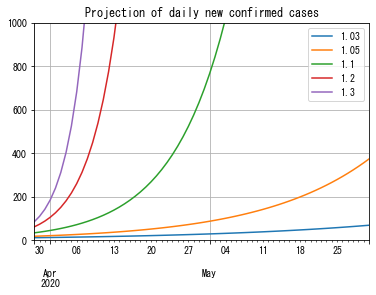

In [38]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

start_date = "2020/03/29"
end_date = "2020/05/31"
I0 = 362
reproduction_rates = np.array([1.03, 1.05, 1.1, 1.2, 1.3])

dates = pd.date_range(start_date, end_date)
c = np.zeros((len(dates), len(reproduction_rates)))
for i in range(len(reproduction_rates)):
    c[:,i] = reproduction_rates[i] ** (np.arange(len(dates)) - 1) * I0 * (reproduction_rates[i] - 1)


sim = pd.DataFrame(c, index=dates, columns=reproduction_rates)
sim.plot(ylim=[0, 1000], title="Projection of daily new confirmed cases", grid=True)


,Confirmed,Deaths,Recovered
Country/Region,,,
Australia,1071,7,26
Brazil,1021,15,2
Canada,1278,19,10
Chile,537,0,6
Cruise Ship,712,8,325
Czechia,995,0,6
Denmark,1420,13,1
Ecuador,506,7,3
Finland,523,1,10


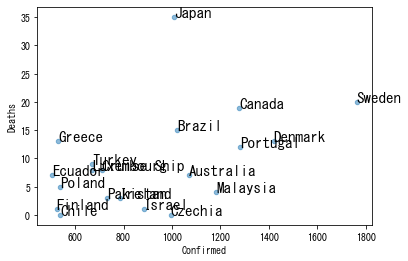

In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-21-2020.csv')
df = df.drop(columns=["Latitude", "Longitude"])
country_df = df.groupby("Country/Region").sum()
country_df = country_df[(country_df["Confirmed"] > 500) & (country_df["Confirmed"] < 2000) ]

# 散布図を描画
a = country_df.plot.scatter(x='Confirmed', y='Deaths', alpha=0.5)
# 各要素にラベルを表示
for k, v in country_df.iterrows():
    # print(k, v)
    a.annotate(k, xy=(v[0],v[1]), size=15)

country_df